App's rating, reviews and price have been analysed against their respective categories. Dataset has been cleaned and downloaded from Kaggle.

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
df = pd.read_csv("/content/googleplaystore.csv")

In [295]:
df.shape

(10841, 13)

In [296]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [297]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [298]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [299]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [300]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [301]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']

In [302]:
cat_features

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

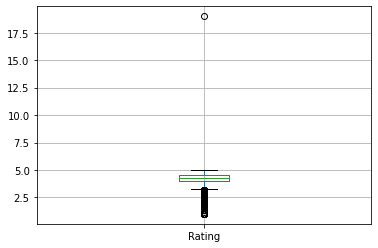

In [303]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f554a2c3750>]],
      dtype=object)

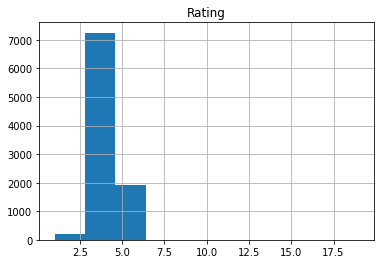

In [304]:
df.hist()

In [305]:
df['Rating'].isnull().sum()

1474

In [306]:
df[df.Rating> 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [307]:
df.drop([10472],axis=0,inplace=True)

In [308]:
#df.drop([10472],inplace=True)

In [309]:
#No output is was dropped
df[df.Rating> 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


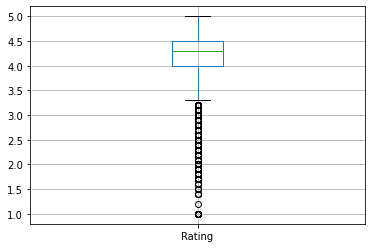

In [310]:
#u can see thtat most of the null values present in the range of 1-3.5
df.boxplot()

In [311]:
df['Current Ver'].isnull().sum()

8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f554a174e90>]],
      dtype=object)

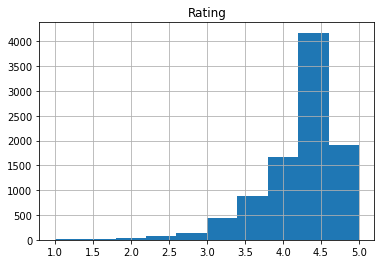

In [312]:
df.hist()

In [313]:
df['Current Ver'] = pd.to_numeric(df['Current Ver'],errors='coerce')
df['Android Ver'] = pd.to_numeric(df['Android Ver'],errors='coerce')

In [314]:
df['Current Ver']

0         NaN
1         NaN
2         NaN
3         NaN
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839     NaN
10840     NaN
Name: Current Ver, Length: 10840, dtype: float64

In [315]:
# modes of categorical values
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    1.0
dtype: float64
Series([], dtype: float64)


In [316]:
#replacing value with median,bcz these are numerical values
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [317]:
#replacing value with mode,because  these are categorical values
df['Current Ver'].fillna(df['Current Ver'].mode().values[0], inplace=True)
df['Type'].fillna(df['Type'].mode().values[0],inplace =True)
df['Android Ver'].fillna(df['Android Ver'].mode(), inplace=True)


In [318]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver       10840
dtype: int64

Now we need to convert string data into numeric values

In [319]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver       float64
Android Ver       float64
dtype: object

In [320]:
#converting review column values into float values
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [321]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [322]:
#here we are replacing $ with blank, else keep it same
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
#converting price column values into float values
df['Price'] = df['Price'].apply(lambda x: float(x))

In [323]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1.0,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.0,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",1.0,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,NaN
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,NaN
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,NaN
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0.0,Everyone,Art & Design,"June 14, 2018",1.0,NaN
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0.0,Everyone,Art & Design,"September 20, 2017",1.0,NaN
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,NaN


In [324]:
df.describe()

,Rating,Reviews,Price,Current Ver,Android Ver
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,0.0
mean,4.206476,4.441529e+05,1.027368,1.385360e+05,NaN
std,0.480342,2.927761e+06,15.949703,1.207466e+07,NaN
min,1.000000,0.000000e+00,0.000000,1.000000e-01,NaN
25%,4.100000,3.800000e+01,0.000000,1.000000e+00,NaN
50%,4.300000,2.094000e+03,0.000000,1.000000e+00,NaN
75%,4.500000,5.477550e+04,0.000000,1.000000e+00,NaN
max,5.000000,7.815831e+07,400.000000,1.255162e+09,NaN


In [325]:
group = df.groupby('Category')

In [326]:
print(group)

In [327]:
#here we are considering mean of diff ratings,sum of diff prices,mean of diff reviews
x = group['Rating'].agg(np.mean)
y = group['Price'].agg(np.sum)
z = group['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

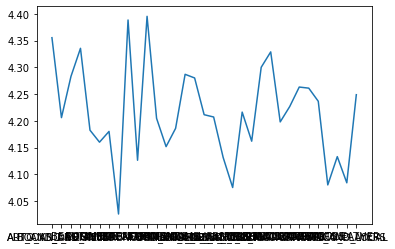

In [328]:
plt.plot(x)

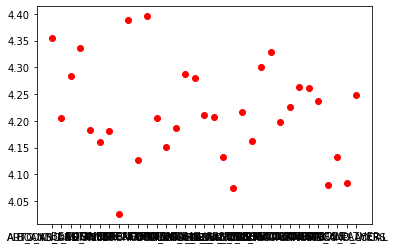

In [329]:
plt.plot(x,'ro')

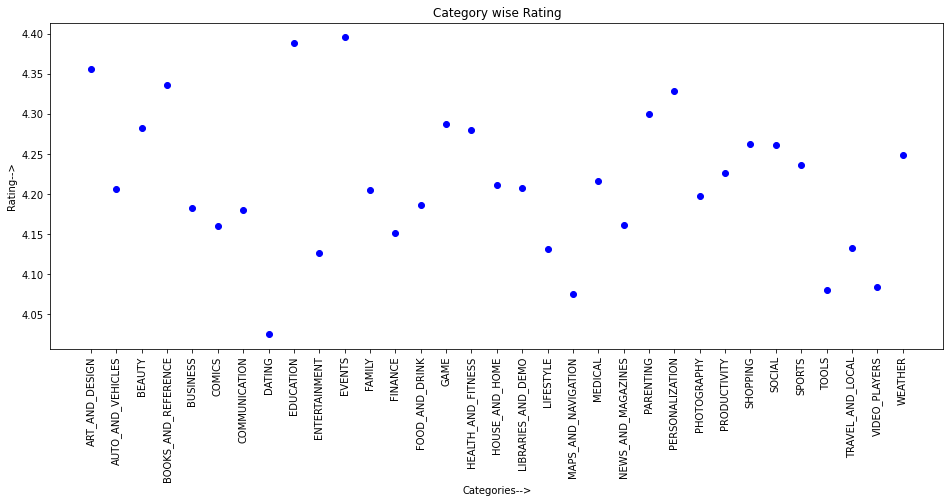

In [330]:
#you can observe from above plot the xaxis is too clumsy
plt.figure(figsize=(16,6))
plt.plot(x, "ro", color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()


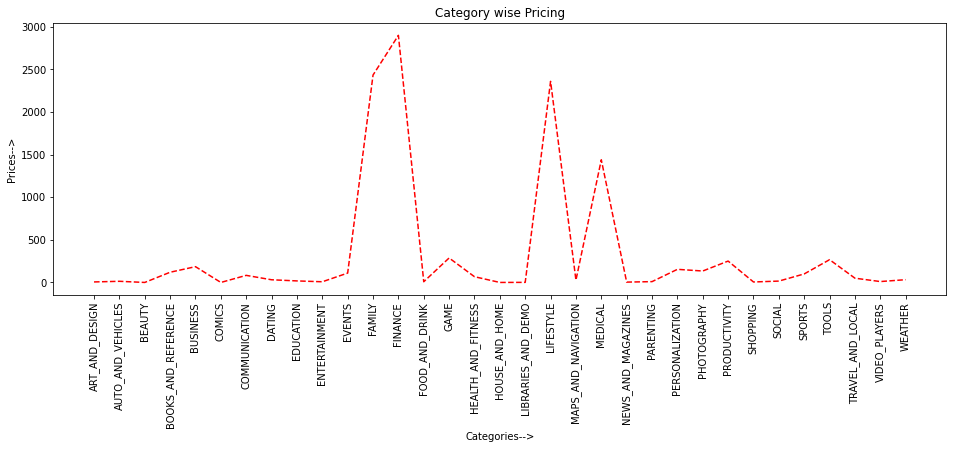

In [331]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

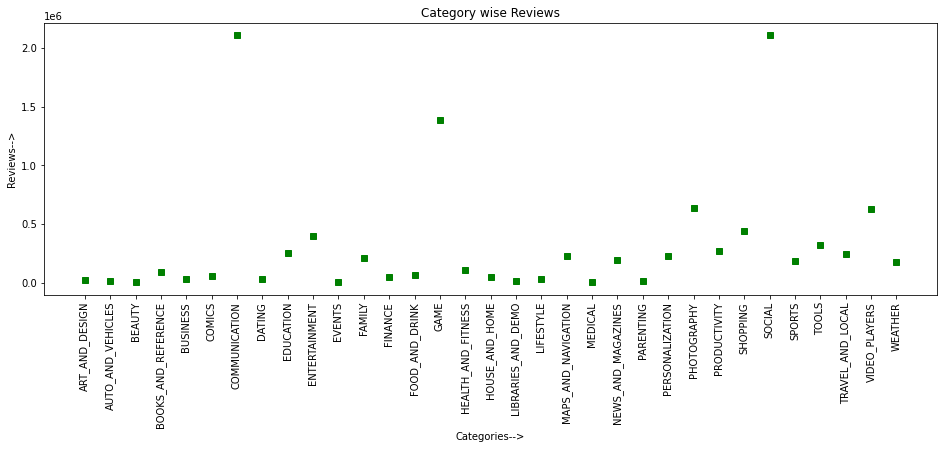

In [332]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()